In [7]:
import sys

# 推奨された方法ではない。
# 参照:https://note.com/iamhacchin/n/n8eb3efafadf9
sys.path.append("../scripts/")
from robot import *


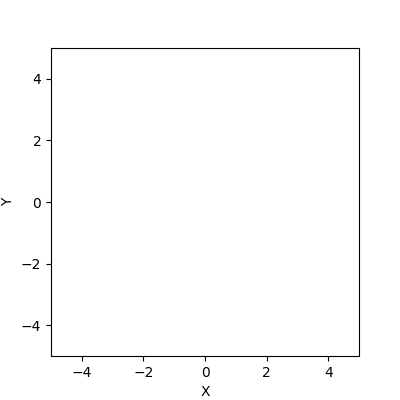

In [8]:
import copy

world = World(40,0.1)

initial_pose=np.array([0,0,0]).T
robots=[]
r = Robot(initial_pose, sensor=None, agent=Agent(0.1, 0.0))

for i in range(100):
    # ロボットをコピー
    copy_r = copy.copy(r)
    # @note distance_until_nose=最初に小石を踏むまでの道のりを指数分布からrvs()を使ってドローしている
    # rの生成時点ですでにドローしているが、このままでは全てのロボットが同じ小石を踏むまでの道のりになってしまう。
    #　最初にノイズが発生するタイミングを変える
    copy_r.distance_until_nose=copy_r.noise_pdf.rvs()
    world.append(copy_r) # worldに登録することでアニメーションの際に動く
    robots.append(copy_r) # オブジェクトの参照のリストにロボットのオブジェクトを登録

%matplotlib widget
world.draw()

0.1m/sでロボットを4m走らせて移動後の姿勢を記録することを同じロボットで100回繰り返すという実験。

In [14]:
import pandas as pd

# r=各ロボットの移動量
# theta=各ロボットの向き
poses = pd.DataFrame(
    [[math.sqrt(r.pose[0] ** 2 + r.pose[1] ** 2), r.pose[2]] for r in robots],
    columns=["r", "theta"],
)
poses.transpose()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
r,4.530878,4.525854,4.509220,4.524445,4.531935,4.508614,4.527654,4.533844,4.524407,4.522666,...,4.515181,4.518718,4.53406,4.457491,4.508261,4.526666,4.531747,4.510651,4.518533,4.530198
theta,0.014383,0.035881,-0.304591,-0.205639,-0.090456,-0.445815,0.061395,-0.083805,-0.013606,0.013413,...,0.177115,-0.203988,-0.05921,-0.352342,-0.339301,0.072394,-0.047303,-0.334229,-0.289945,0.051970


In [15]:
print(poses["theta"].var())
print(poses["r"].mean())
math.sqrt(poses["theta"].var()/poses["r"].mean())

0.054550481403616805
4.515955852273942


0.10990677131289794

分散の大きさがロボットが進んだ道のりに比例するなら1mあたりの分散は1行目を2行目で割った値になり、標準偏差$\sigma_{\omega\nu}$は正の平方根となる。